## create data set

In [1]:
# Import necessary packages
import tensorflow as tf
import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # reproducible
# np.random.seed(1)
# tf.set_random_seed(1)

In [3]:
def xy_batch(n):
    x = np.random.rand(n)*1000
    x = x.reshape(n,1)
    x1 = x
    
    x = np.random.rand(n)*1
    x = x.reshape(n,1)
    
    x2 = x
    
    x = np.hstack( (x1, x2) )
    
#     y = np.sin(1*x1 +1000*x2) + 20
    y = 1*x1 +1000*x2 + 20
#     y = x1 + x2*10 + 23
    return x, y

In [4]:
x_test, y_test = xy_batch(10)
print(x_test, y_test)

[[  9.06747106e+02   5.85471890e-01]
 [  6.13061409e+01   1.23178405e-01]
 [  5.06742017e+02   9.71250988e-01]
 [  8.94208883e+02   7.73963845e-01]
 [  8.98344192e+02   8.51555203e-01]
 [  5.85687657e+02   3.18960942e-01]
 [  7.21552310e+02   5.97864389e-01]
 [  7.53991661e+02   7.31339459e-02]
 [  2.70912906e+02   8.02350583e-01]
 [  9.63231224e+02   8.72502713e-01]] [[ 1512.21899557]
 [  204.48454603]
 [ 1497.99300459]
 [ 1688.17272891]
 [ 1769.89939533]
 [  924.64859948]
 [ 1339.41669872]
 [  847.12560663]
 [ 1093.26348943]
 [ 1855.73393789]]


In [5]:
import tensorflow as tf
import numpy as np
from numpy import *
import random
from collections import deque

from tqdm import trange

class InkNN():
    def __init__(self):
        self.is_training = tf.placeholder(tf.bool, name="is_training")

        self.x_dim = 2

        self.y_dim = 1

        self.create_network()
        self.create_training_method()

        # Init session
        self.session = tf.InteractiveSession()
        self.session.run(tf.global_variables_initializer())

    def create_network(self):
        # # a: create new network weights
        print("create new network weights ...")
        num_hid = 200
        self.W1 = self.weight_variable([self.x_dim,num_hid])
        self.b1 = self.bias_variable([num_hid])
        self.W2 = self.weight_variable([num_hid,num_hid])
        self.b2 = self.bias_variable([num_hid])
        self.W3 = self.weight_variable([num_hid,self.y_dim])
        self.b3= self.bias_variable([self.y_dim])

        # # # b: restore old network weights
        # print "restore old network weights ..."
        # self.W1, self.b1, self.W2, self.b2, self.W3, self.b3 = self.restore_wb()


        # input layer
        self.x_input = tf.placeholder("float",[None,self.x_dim])

        # norm layer
        self.x_norm = tf.layers.batch_normalization(self.x_input, training=self.is_training)

        # hidden layers        
        h_layer = tf.nn.relu(tf.matmul(self.x_norm,self.W1) + self.b1)
        h_layer02 = tf.nn.relu(tf.matmul(h_layer,self.W2) + self.b2)
        # ouput layer
        self.y_out = tf.matmul(h_layer02,self.W3) + self.b3

    def create_training_method(self):
        self.y_input = tf.placeholder("float",[None, self.y_dim])
        self.cost = tf.reduce_mean(tf.square(self.y_input - self.y_out))
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            self.optimizer = tf.train.AdamOptimizer(0.0001).minimize(self.cost)
            
    def weight_variable(self,shape):
        initial = tf.truncated_normal(shape)
        return tf.Variable(initial)

    def bias_variable(self,shape):
        initial = tf.constant(0.01, shape = shape)
        return tf.Variable(initial)
    def use_nn(self,state):
        return self.y_out.eval(feed_dict = {
          self.x_input:[state],
          self.is_training:False
          })


In [6]:
inknn = InkNN()

create new network weights ...


In [7]:
train_all_ep = 0
loss = []

In [18]:
k = 0
for _ in trange(80):
    train_max_ep = 100
    train_all_ep += train_max_ep
    for train_ep in range(train_max_ep):
        x_test, y_test = xy_batch(10)
        inknn.optimizer.run(feed_dict={
              inknn.x_input:x_test,
              inknn.y_input:y_test,
              inknn.is_training:True
              })

    i=np.random.randint(1,9)
    loss.append( ( inknn.use_nn(x_test[i]) - y_test[i] )/y_test[i] )
    k += 1

100%|██████████| 80/80 [00:13<00:00,  5.90it/s]


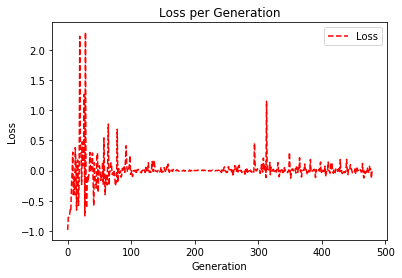

In [19]:
# Plot loss over time
plt.plot(np.array(loss).reshape(-1), 'r--', label='Loss')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

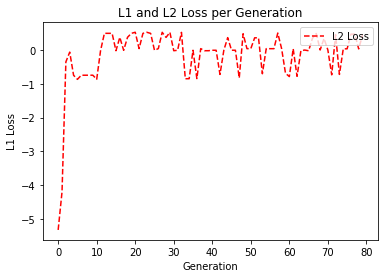

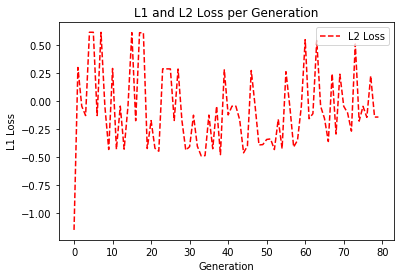

## with normalization of x

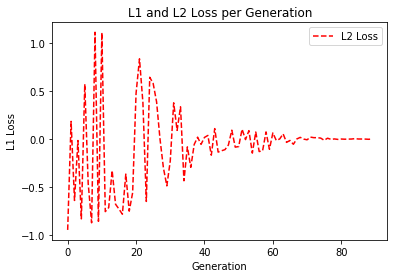

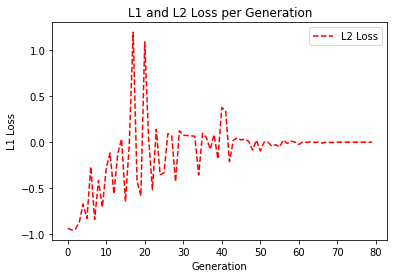

> y = np.sin(1*x1 +1000*x2) + 20

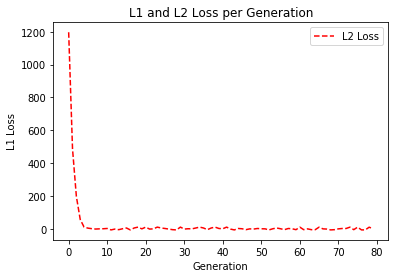